In [1]:
import numpy as np

### Info
| nodo | euros/dia |
| ------------- | ----- |
| 1 | 130 |
| 2 | 130 |
| 3 | 110 |
| 3 | 110 |

Nodo: 72 horas de procesamiento
Numero de analistas: 14
Tiempo de procesamiento: 15.7 y 33.1

### Pregunta 1
¿Cuánto es el máximo que podemos llegar a pagar en un día por los servidores?

En el peor caso cada analista gastara 33.1 horas:

In [2]:
import math
num_analists = 14
num_hours_per_analists_min = 15.7
num_hours_per_analists_max = 33.1
num_processing_hours_per_node = 72
num_of_nodes = (num_analists*num_hours_per_analists_max)/num_processing_hours_per_node
print(math.ceil(num_of_nodes))
exact_num_nodes=math.ceil(num_of_nodes)
costs = (exact_num_nodes-2)*110+2*130
print(costs)

7
810


### Pregunta 2
Pinta un histograma de la distribución de los costes diarios realizando simulaciones de Monte Carlo.

¿Cuál es el coste medio por día que esperamos tener que pagar por los servidores, si siempre pagamos todos los servidores que hacen falta en un día dado?

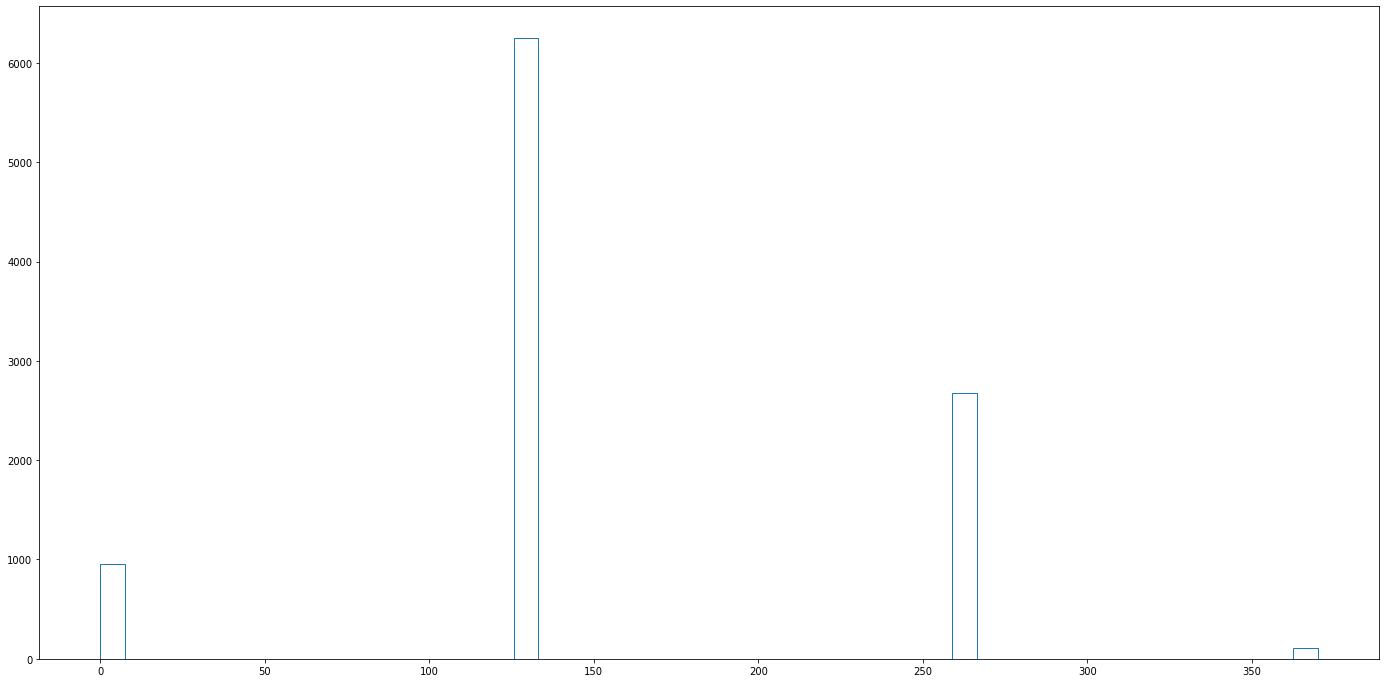

Los costes medios son: 154.915


In [3]:

def prob_do_simulation() -> int:
    prob=0.156
    prob_work = np.random.random()
    if prob_work < prob:
        return 1
    else:
        return 0

def analysts_day():
    analysts_work=[]
    for i in range(14):
        result = prob_do_simulation()
        if result == 1:
            analysts_work.append(result)
        
    return len(analysts_work)
    
def calculate_costs_day(num_analists):
    num_hours_per_analists_total = 0
    for analist in range(num_analists):
        num_hours_per_analists_total += np.random.uniform(num_hours_per_analists_min, num_hours_per_analists_max)
        
    num_of_nodes = math.ceil((num_hours_per_analists_total)/num_processing_hours_per_node)
    if num_of_nodes > 2:
        return (num_of_nodes-2)*110+2*130
    else:
        return num_of_nodes*130

costs = []
for i in range(10000):
    costs.append(calculate_costs_day(analysts_day()))

import matplotlib.pyplot as plt
plt.figure(figsize=(24, 12))
plt.hist(costs, bins = 50, fill=False, histtype='step')
_ = plt.show()
        
average = sum(costs) / len(costs) 
print("Los costes medios son: "+str(average))

### Pregunta 3
Supongamos que siempre pagamos todos los servidores que hacen falta en un día dado.

Pinta un histograma de la distribución de los gastos semanales realizando experimentos de Monte Carlo.

¿Cuál es la probabilidad que el gasto en una semana laborable (5 días) supere los 900 euros?

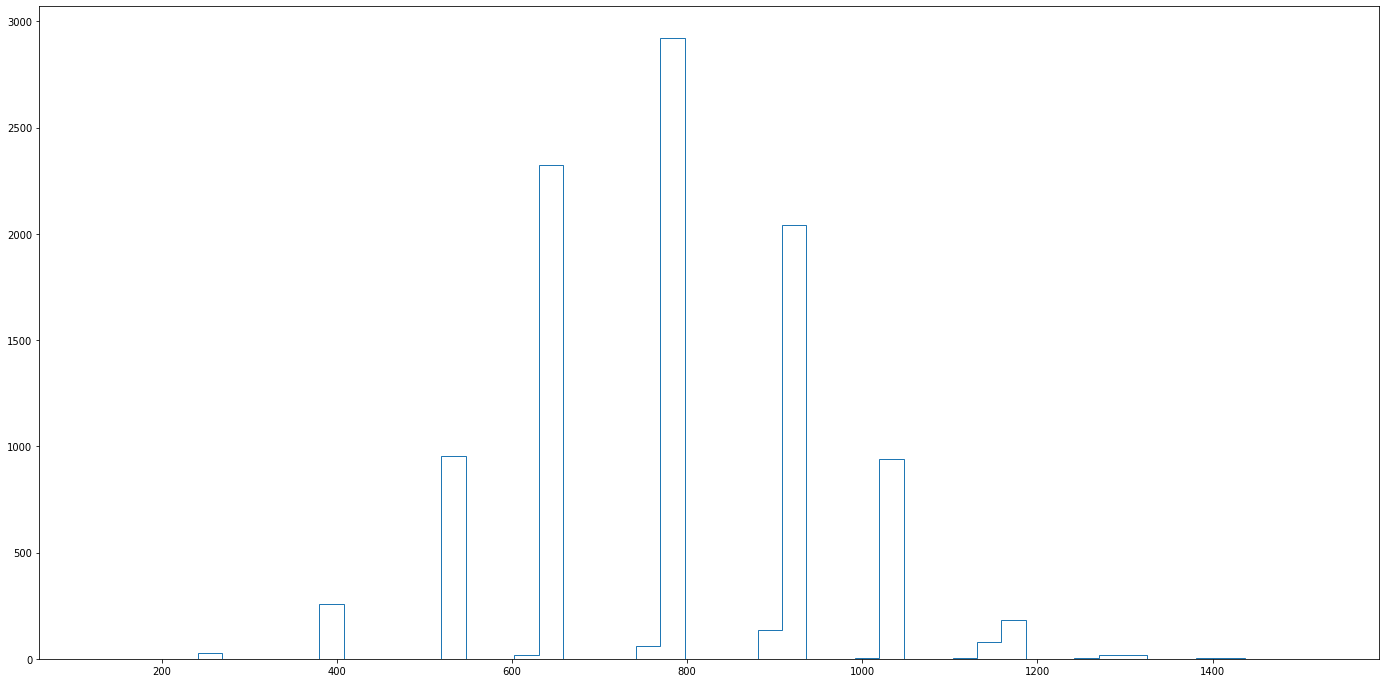

Los costes medios por semana son: 778.031
la probabilidad es 32.99


In [4]:
costs = []

for i in range(10000):
    costs_one_week = []
    for x in range(5):
        costs_one_week.append(calculate_costs_day(analysts_day()))
    
    costs.append(sum(costs_one_week))

import matplotlib.pyplot as plt
plt.figure(figsize=(24, 12))
plt.hist(costs, bins = 50, fill=False, histtype='step')
_ = plt.show()
        
average = sum(costs) / len(costs) 
print("Los costes medios por semana son: "+str(average))

num_greater_900 = [x for x in costs if x > 899]
prob_num_greater_900 = (len(num_greater_900)/len(costs))*100

print("la probabilidad es "+str(prob_num_greater_900))

### Pregunta 4
El departamento de contabilidad exige que cerremos el presupuesto diario por adelantado, para pedir un préstamo para financiar las operaciones del mes siguiente.

No podemos pagar suficiente para garantizar que nunca se quede nadie sin servicio.

Hemos decidido que vamos bien si el 90% de los diás todos los jobs de FEA encolados acaban: es aceptable que se queden jobs sin acabar en un 10% de los días.

¿Cuánto es lo mínimo que tenemos que pagar al día para tener una probabilidad del 90% de tener capacidad para todos los jobs?

In [5]:
costs = []

for i in range(20000):
    costs.append(calculate_costs_day(analysts_day()))

print(np.percentile(costs,90))
aux = np.percentile(costs,90)
print(aux/130)

260.0
2.0
